Importing required libraries


In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

Converting csv file into dataframe

In [145]:
df=pd.read_csv('Google-Playstore-Full.csv')

C:\Users\Nikhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Checking out the data

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267051 non-null  object 
 1   Category         267051 non-null  object 
 2   Rating           267052 non-null  object 
 3   Reviews          267051 non-null  object 
 4   Installs         267052 non-null  object 
 5   Size             267052 non-null  object 
 6   Price            267052 non-null  object 
 7   Content Rating   267052 non-null  object 
 8   Last Updated     267052 non-null  object 
 9   Minimum Version  267051 non-null  object 
 10  Latest Version   267049 non-null  object 
 11  Unnamed: 11      18 non-null      object 
 12  Unnamed: 12      3 non-null       object 
 13  Unnamed: 13      2 non-null       object 
 14  Unnamed: 14      1 non-null       float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


Dropping the null values

In [147]:
df=df.drop(columns=['Unnamed: 11', 'Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Last Updated', 'Minimum Version', 'Latest Version'])

In [148]:
df = df[df.Size.str.contains('\d')]
df.Size[df.Size.str.contains('k')] = "0."+df.Size[df.Size.str.contains('k')].str.replace('.','')
df.Size = df.Size.str.replace('k','')
df.Size = df.Size.str.replace('M','')
df.Size = df.Size.str.replace(',','')
df.Size = df.Size.str.replace('+','')
df.Size = df.Size.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255325 entries, 2 to 267051
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   App Name        255324 non-null  object 
 1   Category        255324 non-null  object 
 2   Rating          255325 non-null  object 
 3   Reviews         255324 non-null  object 
 4   Installs        255325 non-null  object 
 5   Size            255325 non-null  float64
 6   Price           255325 non-null  object 
 7   Content Rating  255325 non-null  object 
dtypes: float64(1), object(7)
memory usage: 27.5+ MB


In [149]:
df = df[df.Installs.str.contains('\+')]
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace(',','')
df.Installs.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255308 entries, 2 to 267051
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   App Name        255307 non-null  object 
 1   Category        255308 non-null  object 
 2   Rating          255308 non-null  object 
 3   Reviews         255308 non-null  object 
 4   Installs        255308 non-null  object 
 5   Size            255308 non-null  float64
 6   Price           255308 non-null  object 
 7   Content Rating  255308 non-null  object 
dtypes: float64(1), object(7)
memory usage: 17.5+ MB


In [150]:
df.Price = df.Price.str.contains('1|2|3|4|5|7|8|9').replace(False, 0)

In [151]:
df = df[df.applymap(np.isreal).Reviews]
df.Reviews = df.Reviews.astype(float)
df.Rating=df.Rating.astype(float)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191674 entries, 2 to 267051
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   App Name        191674 non-null  object 
 1   Category        191674 non-null  object 
 2   Rating          191674 non-null  float64
 3   Reviews         191674 non-null  float64
 4   Installs        191674 non-null  object 
 5   Size            191674 non-null  float64
 6   Price           191674 non-null  float64
 7   Content Rating  191674 non-null  object 
dtypes: float64(4), object(4)
memory usage: 13.2+ MB


Getting an idea about the data

In [153]:
df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating
2,Peapod,SHOPPING,3.656329,1967.0,100000,1.4,0.0,Everyone
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000,16.0,0.0,Everyone
5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000,23.0,0.0,Everyone
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000,4.1,0.0,Everyone
12,FreshDirect,LIFESTYLE,3.213528,754.0,100000,39.0,0.0,Everyone


Identifying the categories for apps

In [154]:
categories = list(df["Category"].unique())
print("There are {0:.0f} categories in our DataSet)".format(len(categories)-1))
print(categories)


There are 49 categories in our DataSet)
['SHOPPING', 'FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'LIFESTYLE', 'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY', 'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO', 'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION', 'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'GAME_WORD', 'ART_AND_DESIGN', 'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY', 'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'BEAUTY', 'SOCIAL', 'MAPS_AND_NAVIGATION', 'GAME_CASINO', 'GAME_CARD', 'SPORTS', 'AUTO_AND_VEHICLES', 'GAME_RACING', 'TOOLS', 'PERSONALIZATION', 'LIBRARIES_AND_DEMO', 'COMICS', 'DATING', 'WEATHER', 'PARENTING', 'MEDICAL', 'TRAVEL']


In [155]:
df['Rating'].isnull().sum()

0

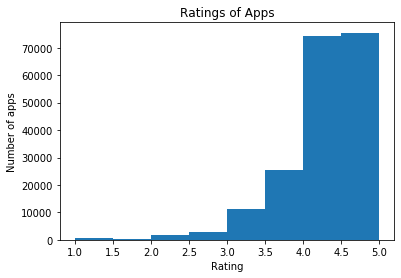

In [156]:
fig,ax = plt.subplots(1,1)
a = df['Rating']
a=a.astype(float)
ax.hist(a, bins = [1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_title("Ratings of Apps")
ax.set_xlabel('Rating')
ax.set_ylabel('Number of apps')
plt.show()


In [157]:
highRating = df.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum

Category
ART_AND_DESIGN          647
AUTO_AND_VEHICLES       690
BEAUTY                  389
BOOKS_AND_REFERENCE    7273
BUSINESS               2045
COMICS                  253
COMMUNICATION          1730
DATING                  127
EDUCATION              9293
ENTERTAINMENT          6601
EVENTS                  162
FINANCE                3047
FOOD_AND_DRINK          963
GAME_ACTION             875
GAME_ADVENTURE          608
GAME_ARCADE            1063
GAME_BOARD              529
GAME_CARD               687
GAME_CASINO             255
GAME_CASUAL            1189
GAME_EDUCATIONAL        867
GAME_MUSIC              135
GAME_PUZZLE            1795
GAME_RACING             405
GAME_ROLE_PLAYING       743
GAME_SIMULATION         975
GAME_SPORTS             443
GAME_STRATEGY           585
GAME_TRIVIA             350
GAME_WORD               548
HEALTH_AND_FITNESS     2422
HOUSE_AND_HOME          282
LIBRARIES_AND_DEMO      244
LIFESTYLE              4908
MAPS_AND_NAVIGATION    1109
MEDICAL    

Installs and reviews  have highest logical corelation

In [160]:
popApps = df.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
'''popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")
'''
popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App Name','Installs','Content Rating','Reviews']]

,App Name,Installs,Content Rating,Reviews
0,Samsung Keyboard,500000000,Everyone,12582.0
1,Hill Climb Racing,500000000,Everyone,9257863.0
2,Dropbox,500000000,Everyone,1920612.0
3,LINE: Free Calls & Messages,500000000,Everyone,11390281.0
4,Pou,500000000,Everyone,10752323.0
5,Clash of Clans,500000000,Everyone 10+,48401470.0
6,HP Print Service Plugin,500000000,Everyone,1976168.0
7,Briefing,500000000,Everyone 10+,377071.0
8,Device Care,500000000,Everyone,99127.0
9,UC Browser � Short Video Status & Video Downlo...,500000000,Teen,19573637.0


In [168]:
df2 = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
df2['Category']= label_encoder.fit_transform(df2['Category']) 
df2['Content Rating']= label_encoder.fit_transform(df2['Content Rating']) 
#df2['Genres']= label_encoder.fit_transform(df2['Genres']) 
df2.Installs=df2.Installs.astype(int)
df2.dtypes

App Name           object
Category            int32
Rating            float64
Reviews           float64
Installs            int32
Size              float64
Price             float64
Content Rating      int32
dtype: object

In [169]:
df2 = df2.drop(["App Name"],axis=1)
print("There are {} total rows.".format(df2.shape[0]))
countPop = df2[df2["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((df2.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(df2.shape[0]*.20))
df2["Installs"] = (df2["Installs"] > 100000)*1 #Installs Binarized
print("Cut {} apps off Popular df for a total of 3558 Popular training apps.".format(int(4568*.22132)))
print("Cut {} apps off Unpopular df for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

There are 191665 total rows.
23252 Apps are Popular!
168413 Apps are Unpopular!

For an 80-20 training/test split, we need about 38333.0 apps for testing

Cut 1010 apps off Popular df for a total of 3558 Popular training apps.
Cut 766 apps off Unpopular df for a total of 3558 Unpopular training apps.



In [170]:
test1 = df2[df2["Installs"] == 1].sample(1010,random_state=0)
df2 = df2.drop(test1.index)
print("Values were not dropped from training dataframe.",test1.index[0] in df2.index)
print(df2.head())

Values were not dropped from training dataframe. False
   Category    Rating     Reviews  Installs  Size  Price  Content Rating
0        41  3.755762     12582.0         1  58.0    0.0               1
1        23  4.440125   9257863.0         1  64.0    0.0               1
2        41  4.390956   1920612.0         1  72.0    0.0               1
3         6  4.185223  11390281.0         1  94.0    0.0               1
4        19  4.330340  10752323.0         1  24.0    0.0               1


In [171]:
test0 = df2[df2["Installs"] == 0].sample(766,random_state=0)
df2 = df2.drop(test0.index)

print("Values were not dropped from training dataframe.",test0.index[0] in df2.index)
print(df2.head())

Values were not dropped from training dataframe. False
   Category    Rating     Reviews  Installs  Size  Price  Content Rating
0        41  3.755762     12582.0         1  58.0    0.0               1
1        23  4.440125   9257863.0         1  64.0    0.0               1
2        41  4.390956   1920612.0         1  72.0    0.0               1
3         6  4.185223  11390281.0         1  94.0    0.0               1
4        19  4.330340  10752323.0         1  24.0    0.0               1


In [172]:
testDf = test1.append(test0)
trainDf = df2
#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)



In [173]:
#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()



In [174]:
X_train = X_train.drop(['Reviews', 'Rating'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
X_test = X_test.drop(['Reviews', 'Rating'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate

In [175]:
print(X_train.head())

   Category  Size  Price  Content Rating
0        11  13.0    0.0               1
1        44   6.5    0.0               1
2         8   9.8    0.0               1
3        39   9.0    0.0               1
4        45   2.1    0.0               1


In [176]:
print(y_train.head())

0    0
1    0
2    0
3    0
4    0
Name: Installs, dtype: int32


In [177]:
print("{} Apps are used for Training.".format(y_train.count()))
print("{} Apps are used for Testing.".format(y_test.count()))

189889 Apps are used for Training.
1776 Apps are used for Testing.
